In [1]:
import sys

In [3]:
!{sys.executable} -m pip install spacy

In [4]:
!{sys.executable} -m pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp37-none-any.whl size=12047111 sha256=103d1cc38652c25e4bb076161ffc37ee96771dd3f616522b2b061c22a0949348
  Stored in directory: C:\Users\Aleem\AppData\Local\pip\Cache\wheels\2b\3f\41\f0b92863355c3ba34bb32b37d8a0c662959da0058202094f46
Successfully built en-core-web-sm


In [5]:
import spacy
import en_core_web_sm

In [6]:
nlp = en_core_web_sm.load()

In [9]:
txt = 'the cat sat on the mat'
doc = nlp(txt)

In [10]:
type(txt)

str

In [11]:
doc

the cat sat on the mat

In [12]:
type(doc)

spacy.tokens.doc.Doc

In [13]:
[x for x in txt]

['t',
 'h',
 'e',
 ' ',
 'c',
 'a',
 't',
 ' ',
 's',
 'a',
 't',
 ' ',
 'o',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'm',
 'a',
 't']

In [14]:
[x for x in doc]

[the, cat, sat, on, the, mat]

In [15]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x23c23a1fc08>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x23c238fa3a8>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x23c238fa468>)]

In [16]:
token = doc[1]
token

cat

In [17]:
token.pos

92

In [18]:
token.pos_

'NOUN'

In [19]:
[token.pos_ for token in doc]

['DET', 'NOUN', 'VERB', 'ADP', 'DET', 'NOUN']

In [20]:
from spacy import displacy

In [21]:
displacy.render(doc)

In [22]:
token

cat

In [23]:
token.dep

429

In [24]:
token.dep_

'nsubj'

In [25]:
token = doc[2]
token

sat

In [26]:
token.lemma

14192039007865877226

In [27]:
nlp.vocab[token.lemma].text

'sit'

In [28]:
token.lemma_

'sit'

In [30]:
[token.lemma_.lower() for token in doc]

['the', 'cat', 'sit', 'on', 'the', 'mat']

In [32]:
with open('Harry-Potter-1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [33]:
text[:200]

'Harry Potter\n\nand the Sorcerer’s Stone\n\n\n\n\n\nby\n\nJ. K. Rowling\n\nIllustrations by Mary Grandpré\n\n\n\nArthur A. Levine Books\n\nAn Imprint of Scholastic Press.\n\n\n\n\n\nFor Jessica, who loves stories\n\nfor Anne, '

In [34]:
text = text[1643:]

In [35]:
text[:200]

'Chapter 1\n\n\n\n\n\nThe Boy Who Lived\n\n\n\n\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect '

In [36]:
import re

In [39]:
chapters = re.split('Chapter \d+\n*[^\n]*\n*', text)
chapters = chapters[1:]

In [41]:
chapters[0]

'Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.\n\nMr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.\n\nThe Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t met for severa

In [42]:
chapter = chapters[2]

In [43]:
doc = nlp(chapter)

In [44]:
type(doc)

spacy.tokens.doc.Doc

In [45]:
sent = doc.sents[0]

TypeError: 'generator' object is not subscriptable

In [46]:
sent = list(doc.sents)[0]

In [47]:
sent

The escape of the Brazilian boa constrictor earned Harry his longest-ever punishment.

In [50]:
displacy.render(sent)

In [51]:
txt1 = 'They\'re racing bikes'
txt2 = 'Their racing bikes'
print([(token, token.lemma_, token.pos_) for token in nlp(txt1)])
print([(token, token.lemma_, token.pos_) for token in nlp(txt2)])

[(They, '-PRON-', 'PRON'), ('re, 'be', 'AUX'), (racing, 'race', 'VERB'), (bikes, 'bike', 'NOUN')]
[(Their, '-PRON-', 'DET'), (racing, 'racing', 'NOUN'), (bikes, 'bike', 'NOUN')]


In [52]:
import pandas as pd

In [55]:
from collections import Counter
Counter([token.pos_ for token in doc])

Counter({'DET': 479,
         'NOUN': 653,
         'ADP': 426,
         'ADJ': 216,
         'VERB': 657,
         'PROPN': 361,
         'ADV': 233,
         'PUNCT': 778,
         'PRON': 330,
         'AUX': 202,
         'SCONJ': 76,
         'CCONJ': 133,
         'SPACE': 133,
         'PART': 132,
         'INTJ': 15,
         'NUM': 50})

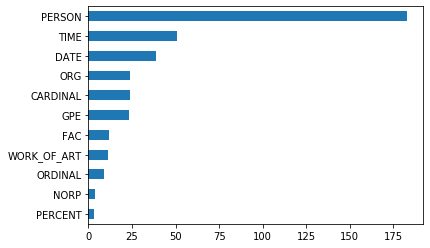

In [68]:
pd.Series([token.ent_type_ for token in doc if token.ent_type_!='']).value_counts().sort_values().plot(kind='barh')

In [60]:
token.text

'sat'

In [61]:
token.text_with_ws

'sat '

In [62]:
sent

The escape of the Brazilian boa constrictor earned Harry his longest-ever punishment.

In [65]:
[ent[0].ent_type_ for ent in sent.ents]

['NORP', 'ORG']

In [64]:
import networkx

In [69]:
links = []
for sent in doc:
    names = [span.text for span in sent.ents if span[0].ent_type_=='PERSON']
    for name1 in names:
        for name2 in names:
            if name1!=name2:
                links.append({
                    'source': name1 if name1<name2 else name2,
                    'target': name2 if name1<name2 else name1,
                    'weight': 
                })

AttributeError: 'spacy.tokens.token.Token' object has no attribute 'ents'